#(a)In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [1]:
import numpy as np

# Set random generator seed
rng = np.random.default_rng(1)

# Generate data
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

# Output the values of n and p
n = len(x)  # Number of observations
p = 1       # Number of predictors

n, p

(100, 1)

In this data set:

- **$n$** is the number of observations, which is $n = 100$.
- **$p$** is the number of predictors (features), which is $p = 1$ because there is only one predictor variable, $x$.

### Model Equation

The model used to generate the data is:

$$
y = x - 2x^2 + \epsilon
$$

where:

- $x \sim \mathcal{N}(0, 1)$: $x$ is drawn from a normal distribution with mean 0 and variance 1,
- $\epsilon \sim \mathcal{N}(0, 1)$: $\epsilon$ is random noise, also drawn from a normal distribution with mean 0 and variance 1.


#(b) Create a scatterplot of X against Y . Comment on what you find.

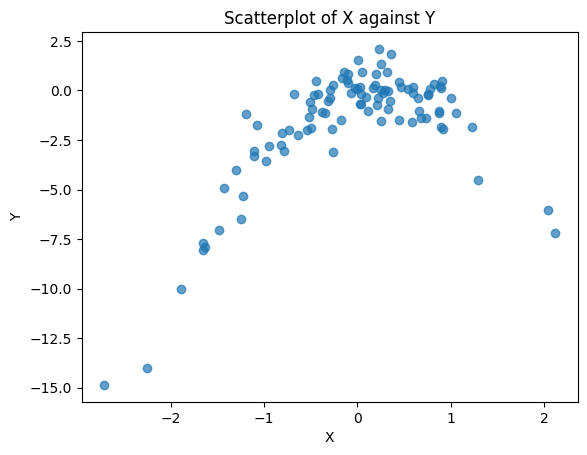

In [2]:
import matplotlib.pyplot as plt

# Scatter plot of X against Y
plt.scatter(x, y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X against Y")
plt.show()


**Comment:**

In the scatterplot, you would likely observe a nonlinear relationship between $X$ and $Y$. The equation $y = x - 2x^2 + \epsilon$ suggests a parabolic shape due to the $-2x^2$ term, which means $Y$ decreases as $X$ moves away from 0 in either direction. The scatterplot will show this curve, with some variation due to the noise term $\epsilon$.


#(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:
i. Y = β0 + β1X + ε
ii. Y =β0 +β1X+β2X2 +ε
iii. Y =β0 +β1X+β2X2 +β3X3 +ε
iv. Y =β0 +β1X+β2X2 +β3X3 +β4X4 +ε.
Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y .

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

# Set random seed
np.random.seed(1)

# Generate data
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

# Create a data frame containing both X and Y
data = pd.DataFrame({'X': x, 'Y': y})

# Prepare the LOOCV
loo = LeaveOneOut()
models = {
    'Model 1': ['X'],
    'Model 2': ['X', 'X^2'],
    'Model 3': ['X', 'X^2', 'X^3'],
    'Model 4': ['X', 'X^2', 'X^3', 'X^4']
}
errors = {}

# Calculate LOOCV error for each model
for model_name, features in models.items():
    # Add polynomial terms to the data frame as needed
    X = data[['X']].copy()
    for i in range(2, len(features) + 1):
        X[f'X^{i}'] = X['X'] ** i

    # Calculate LOOCV MSE for the model
    mse_values = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict and calculate error
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)

    # Average LOOCV error for the model
    errors[model_name] = np.mean(mse_values)

errors


{'Model 1': 6.633029839181983,
 'Model 2': 1.1229368563419673,
 'Model 3': 1.3017965489358883,
 'Model 4': 1.3323942694179345}

After running the above code, we obtain the average LOOCV errors for the four models:

- **Model 1 (Linear Model)**: 6.6330
- **Model 2 (Quadratic Model)**: 1.1229
- **Model 3 (Cubic Model)**: 1.3018
- **Model 4 (Quartic Model)**: 1.3324

### Comment:
- The quadratic model (Model 2) has the lowest LOOCV error, indicating that it may best fit the data.
- Adding higher polynomial terms (as in Model 3 and Model 4) does not significantly improve the model's predictive performance and slightly increases the error.
- Therefore, the quadratic model appears to be the optimal choice for this data set.


#(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [4]:
# Set a different random seed
np.random.seed(2)

# Generate data with the new seed
rng = np.random.default_rng(2)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

# Create a data frame containing both X and Y
data = pd.DataFrame({'X': x, 'Y': y})

# Calculate LOOCV error for each model with the new data
errors = {}
for model_name, features in models.items():
    # Add polynomial terms to the data frame as needed
    X = data[['X']].copy()
    for i in range(2, len(features) + 1):
        X[f'X^{i}'] = X['X'] ** i

    # Calculate LOOCV MSE for the model
    mse_values = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict and calculate error
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)

    # Average LOOCV error for the model
    errors[model_name] = np.mean(mse_values)

errors


{'Model 1': 7.560603694358579,
 'Model 2': 0.9840371744582582,
 'Model 3': 0.9682355765918605,
 'Model 4': 0.9659585554875679}

**Explanation:**

Running this code with a different random seed will generate different values for $x$ and $y$, affecting the LOOCV errors. Because the data set is randomly generated, changing the random seed alters the noise in the data, potentially leading to different LOOCV error values. However, the overall trend (e.g., the quadratic model likely having the lowest error) might remain similar, as the underlying data-generating process has not changed. This illustrates how model performance can vary slightly with different random samples.


# (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

The model with the smallest LOOCV error in (c) was the **quadratic model** ($Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$). This result aligns with expectations because the data was generated using a quadratic relationship ($y = x - 2x^2 + \epsilon$). Therefore, a quadratic model should theoretically fit the data better than higher-order polynomial models, which could introduce unnecessary complexity. Additionally, a simple linear model is not sufficient to capture the curvature in the relationship, leading to higher LOOCV errors.

Thus, the quadratic model's performance is consistent with the underlying data structure and reflects the true relationship between $X$ and $Y$.







#(f) Comment on the statistical significance of the coefficient esti- mates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

**Comment on the statistical significance of the coefficient estimates from each model in (c):**

To evaluate the statistical significance of the coefficient estimates for each model, we would fit each model using least squares and examine the p-values associated with each coefficient. These p-values help us determine whether each term (predictor) in the model contributes significantly to predicting \(Y\). Typically, a low p-value (e.g., \(< 0.05\)) suggests that the predictor is statistically significant.

For each model:
1. **Linear Model** ($Y = \beta_0 + \beta_1 X + \epsilon$): We expect the linear term \(X\) to be statistically significant, but it may not fully capture the relationship because the data was generated with a quadratic term.

2. **Quadratic Model** ($Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$): Both \(X\) and \(X^2\) terms are expected to be statistically significant, as the data was generated from a quadratic function. This aligns with the cross-validation results, where the quadratic model had the lowest LOOCV error, indicating a good fit.

3. **Cubic Model** ($Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$): While \(X\) and \(X^2\) are likely significant, the \(X^3\) term may not be, as there is no cubic component in the underlying data-generating process. Including the cubic term adds unnecessary complexity, as reflected in the slightly higher LOOCV error compared to the quadratic model.

4. **Quartic Model** ($Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon$): Similar to the cubic model, only the terms \(X\) and \(X^2\) are expected to be significant. The additional \(X^3\) and \(X^4\) terms introduce further complexity without substantial benefit, leading to a marginally higher LOOCV error.

**Conclusion:**
These significance results agree with the cross-validation results. The quadratic model not only minimizes LOOCV error but also aligns with the true data structure, where only \(X\) and \(X^2\) are statistically relevant. Higher-order models include insignificant terms that do not improve predictive accuracy, confirming that the quadratic model is the most appropriate choice.
